In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("HR_maas.csv", sep=";")
data.head()

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   deneyim  10 non-null     int64
 1   maas     10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [6]:
data.describe()

,deneyim,maas
count,10.00000,10.000000
mean,5.50000,24950.000000
std,3.02765,29937.388367
min,1.00000,4500.000000
25%,3.25000,6500.000000
50%,5.50000,13000.000000
75%,7.75000,27500.000000
max,10.00000,100000.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

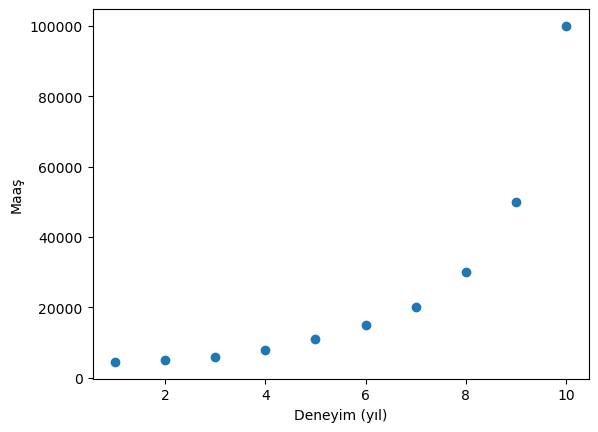

In [9]:

# veri setine bir bakalım..

plt.scatter(data[['deneyim']],data['maas'])
plt.xlabel("Deneyim (yıl)")
plt.ylabel("Maaş")
plt.show()

In [11]:
lr = LinearRegression()
lr.fit(data[['deneyim']],data['maas'])

LinearRegression()

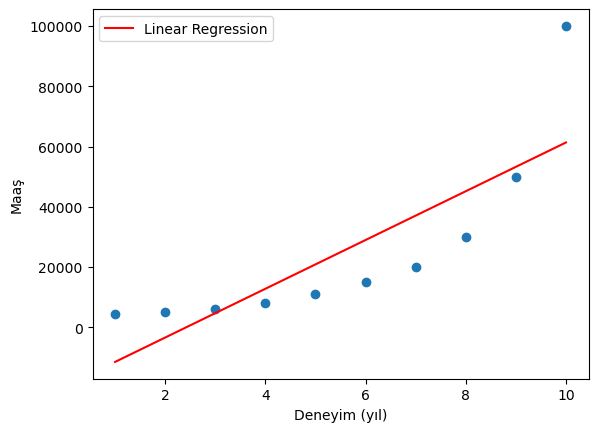

In [13]:
plt.scatter(data['deneyim'],data['maas'])  
plt.xlabel('Deneyim (yıl)')
plt.ylabel('Maaş')

x = data["deneyim"]
y = lr.predict(data[["deneyim"]])

plt.plot(x, y, color = "red", label = "Linear Regression")
plt.legend()
plt.show()

In [15]:
# Görüldüğü gibi doğrusal bir yapıda dağılmıyor veriler

#### Tahmin için kötü bir doğru, demek ki bu veri seti için lineer regresyon uygulamak doğru değilmiş. Unutmayın veri setinize göre model seçmeliyiz.
#### Öncelikle veri setinize çok iyi hakim olmalı ve bilmelisiniz.

#### Bu veri seti için regression çeşitlerinden polynomial regression uygulanması gerektiğine kara verdik. Şimdi nasıl uyguladığımıza bakalım:

In [20]:
# x değerimizi yukarıdaki fonksiyona uyacak bir polinom bulmaya çalışıyoruz.

# bir adet polynomial regression nesnesi oluşturması için PolynomialFeatures fonksiyonunu çağırıyoruz
# Bu fonksiyonu çağırırken polinomun derecesini (N) belirtiyoruz.

# polinomal özellikler oluştur. 
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(data[["deneyim"]])

In [22]:
lr=LinearRegression()
lr.fit(x_train_poly, data["maas"])

LinearRegression()

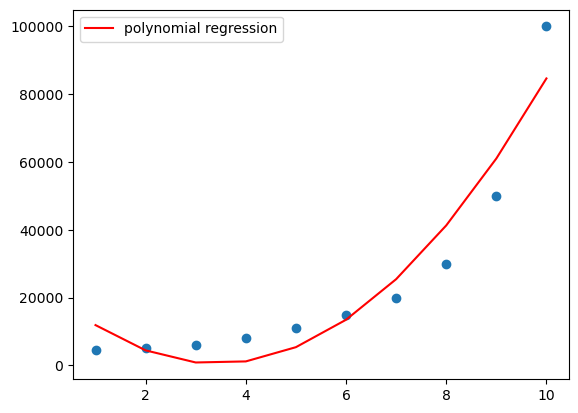

In [28]:
y_pred = lr.predict(x_train_poly)
plt.plot(data["deneyim"], y_pred, color="red", label="polynomial regression")
plt.legend()

plt.scatter(data["deneyim"],data["maas"])

plt.show()

In [ ]:
# degree=2 ile elde edilen grafik.